Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Load the Dataset**

In [3]:
# Reading the dataset

df = pd.read_csv("/content/Churn_Modelling.csv")

**3.Perform Below Visualizations**

Univariate Analysis

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


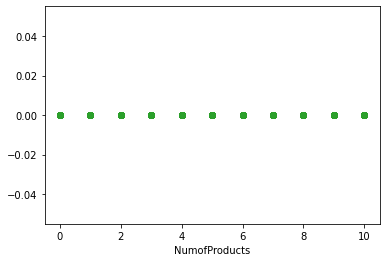

In [5]:
df_France=df.loc[df['Geography']=='France']
df_Spain=df.loc[df['Geography']=='Spain']
df_Germany=df.loc[df['Geography']=='Germany']
plt.plot(df_France['Tenure'],np.zeros_like(df_France['Tenure']),'o')
plt.plot(df_Spain['Tenure'],np.zeros_like(df_Spain['Tenure']),'o')
plt.plot(df_Germany['Tenure'],np.zeros_like(df_Germany['Tenure']),'o')
plt.xlabel('NumofProducts')
plt.show()

Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


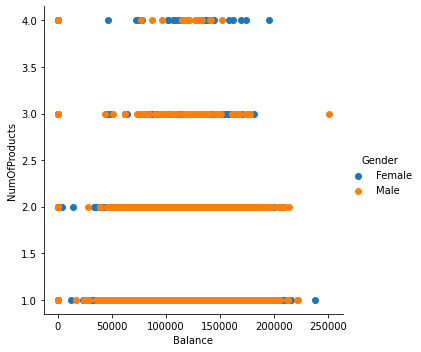

In [6]:
sns.FacetGrid(df,hue="Gender",size=5).map(plt.scatter,"Balance","NumOfProducts").add_legend()
plt.show()

Multivariate Analysis

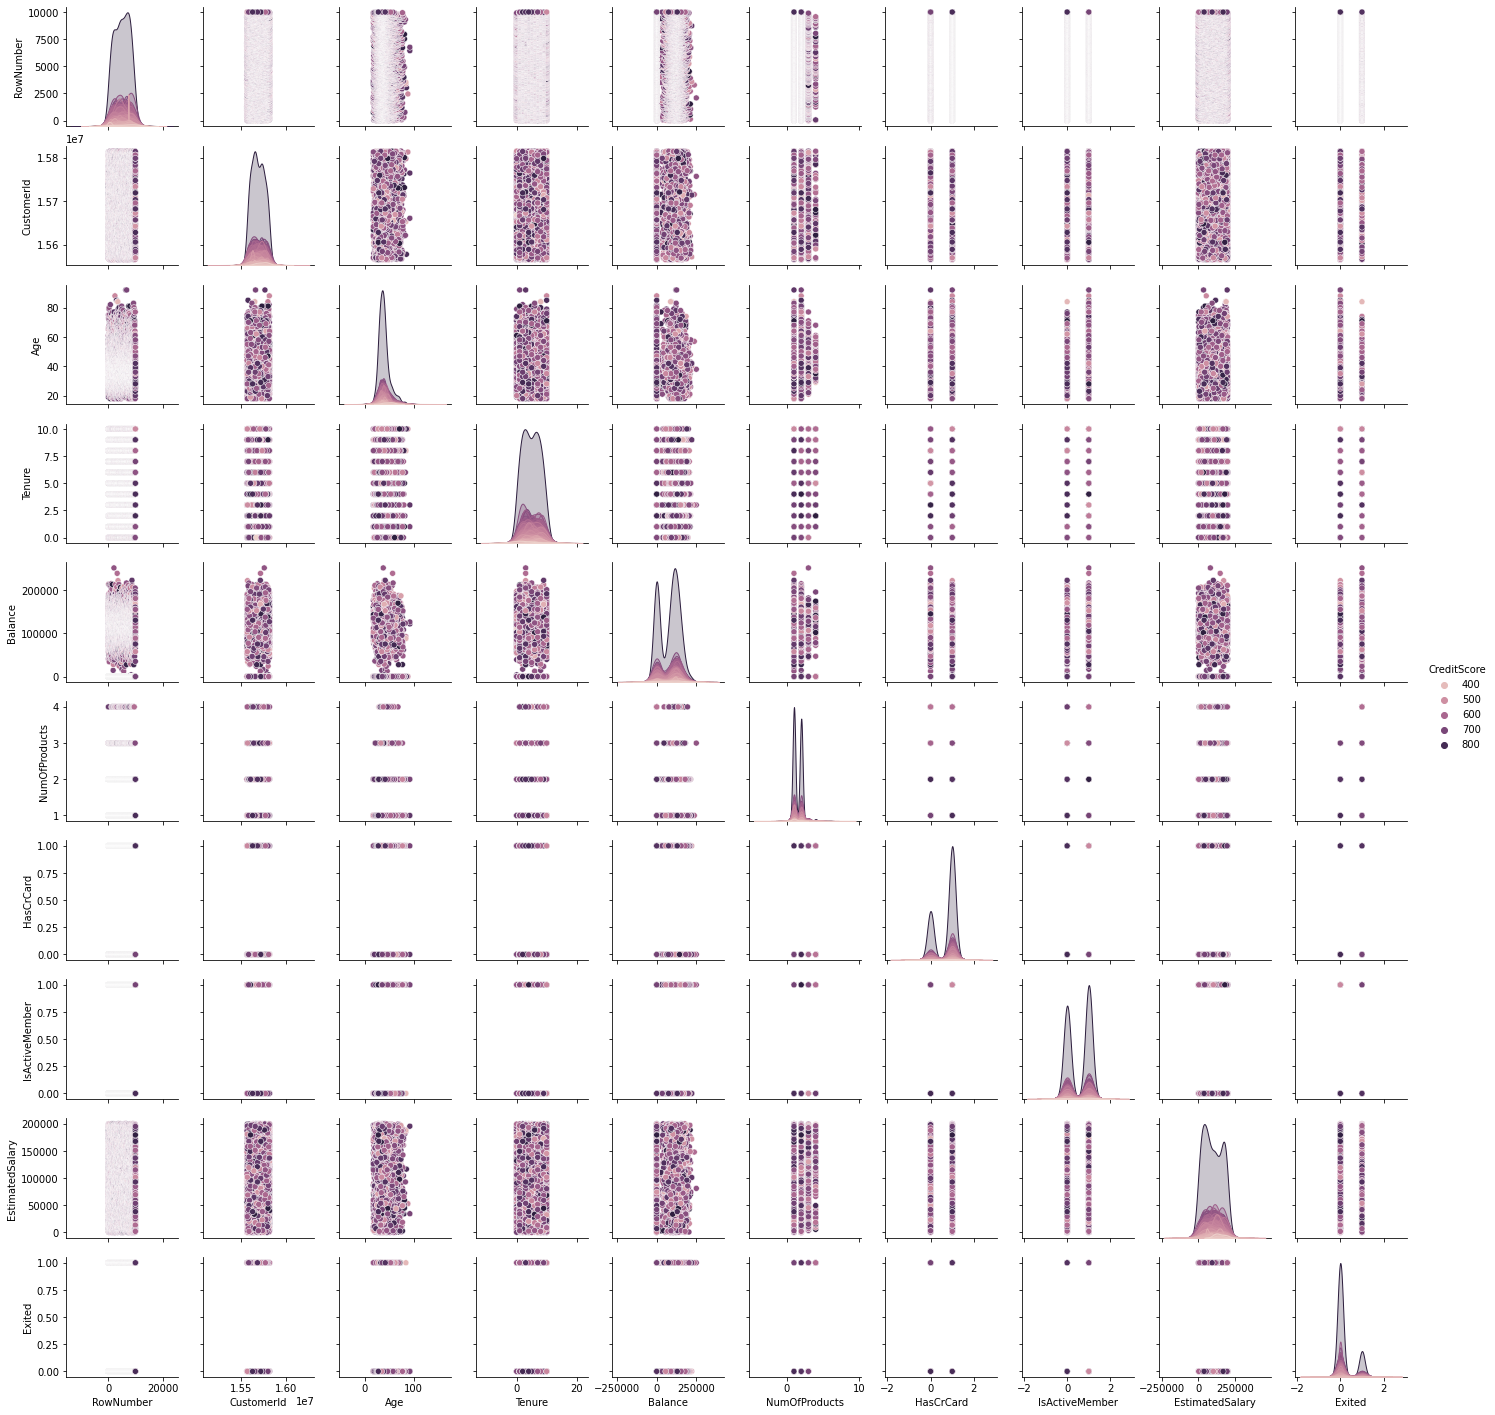

In [7]:
sns.pairplot(df, hue="CreditScore", height=2)

**4.Perform descriptive statistics on the dataset.**

In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**5. Handle the Missing values.**

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.notnull().sum()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [13]:
bool_series = pd.isnull(df["Balance"])
   
# filtering data
# displaying data only with Gender = NaN
df[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
bool_series = pd.notnull(df["Tenure"])
   
# filtering data
# displaying data only with Gender = Not NaN
df[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
# filling a null values using fillna()
df["Gender"].fillna("No Gender", inplace = False)
 
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
# Printing the first 10 to 24 rows of
# the data frame for visualization  
df[20:45]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
21,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
23,24,15725737,Mosman,669,France,Male,46,3,0.00,2,0,1,8487.75,0
24,25,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16,0
25,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
27,28,15700772,Nebechi,571,France,Male,44,9,0.00,2,0,0,38433.35,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
29,30,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0


In [17]:
#Checking Duplicate 
df = df.drop_duplicates(subset ="HasCrCard",)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [18]:
df.value_counts("Surname")

Surname
Hargrave    1
Hill        1
dtype: int64

# **6. Find the outliers and replace the outliers**

In [19]:
for x in ['Age']:
 
    df.loc[df[x] < 67,x] = np.nan
    df.loc[df[x] > 30,x] = np.nan


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**7. Check for Categorical columns and perform encoding.**

In [27]:
df_numeric = df[['RowNumber',	'CustomerId','CreditScore', 'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']]
df_categorical = df[['Surname', 'Geography',	'Gender']]


In [26]:
print(df['Surname'].unique())
print(df['Geography'].unique())
print(df['Gender'].unique())

['Hargrave' 'Hill']
['France' 'Spain']
['Female']


In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

geography_encoder = OneHotEncoder()
geography_reshaped = np.array(df_categorical['Geography']).reshape(-1, 1)
geography_values = geography_encoder.fit_transform(geography_reshaped)

print(df_categorical['Geography'][:5])
print()
print(geography_values.toarray()[:5])
print()
print(geography_encoder.inverse_transform(geography_values)[:5])

0    France
1     Spain
Name: Geography, dtype: object

[[1. 0.]
 [0. 1.]]

[['France']
 ['Spain']]


In [21]:
#Splitting the Dataset into the Independent Feature Matrix
name	 = df.iloc[:, :-1].values
print(name)

[[1 15634602 'Hargrave' 619 'France' 'Female' nan 2 0.0 1 1 1 101348.88]
 [2 15647311 'Hill' 608 'Spain' 'Female' nan 1 83807.86 1 0 1 112542.58]]


In [22]:
#Extracting the Dataset to Get the Dependent Vector
Member= df.iloc[:, -1].values
print(Member)

[1 0]


In [23]:
# Split the data (Independent and dependent)

x = df.drop('IsActiveMember',axis=1)
y = df['EstimatedSalary']
print(x)
print(y)

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female  NaN   
1          2    15647311      Hill          608     Spain  Female  NaN   

   Tenure   Balance  NumOfProducts  HasCrCard  EstimatedSalary  Exited  
0       2      0.00              1          1        101348.88       1  
1       1  83807.86              1          0        112542.58       0  
0    101348.88
1    112542.58
Name: EstimatedSalary, dtype: float64


**9. Scale the independent variables**

*   List item

## *   List item
*   List item


*   List item



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

tips_ds  = sns.load_dataset('tips')
tips_ds.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**10. Split the data into training and testing**

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)